In [4]:
import data_preparation
import train_test

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

In [6]:
# Reading data into Pandas datafram
df = pd.read_csv(r'D:\Data Science\NLP CB\Resume Screening NLP\UpdatedResumeDataSet.csv')
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [7]:
category = df['Category'].value_counts()
category

Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: Category, dtype: int64

In [8]:
df['Category'].unique()

array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
       'Mechanical Engineer', 'Sales', 'Health and fitness',
       'Civil Engineer', 'Java Developer', 'Business Analyst',
       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
       'Operations Manager', 'Python Developer', 'DevOps Engineer',
       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
      dtype=object)

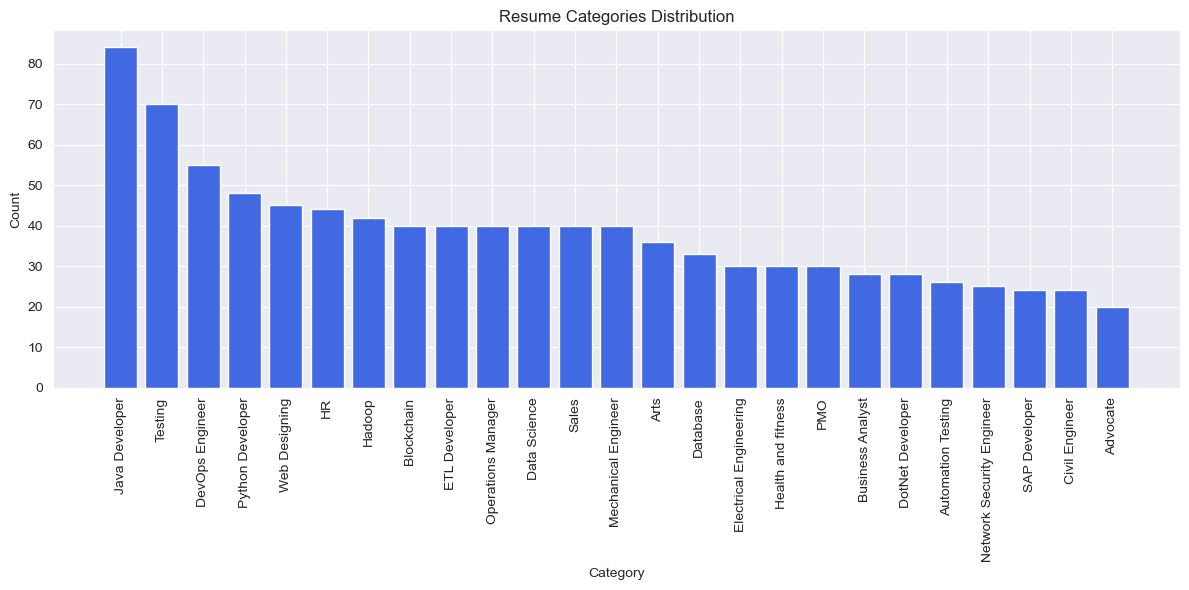

In [9]:
# Defining category data
categories = df['Category'].value_counts().index
counts = df['Category'].value_counts().values

# Create a bar plot
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(categories, counts, color='royalblue')  # Create the bar plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.xlabel('Category')  # Set the x-axis label
plt.ylabel('Count')  # Set the y-axis label
plt.title('Resume Categories Distribution')  # Set the title
plt.tight_layout()  # Ensure the plot fits within the figure size

# Show the plot
plt.show()


In [10]:
df['cleaned'] = df['Resume'].apply(lambda x:data_preparation.cleanResume(x))
df['cleaned'] = df['cleaned'].apply(lambda x:data_preparation.lemmat(x))
df.head()

,Category,Resume,cleaned
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python panda nump...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [11]:
df=data_preparation.encode_labels(df)
df.head()

,Category,Resume,cleaned,encoded_Category
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python panda nump...,6
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,6
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...,6
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,6
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...,6


In [12]:
df['encoded_Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [13]:
WordFeatures, target=data_preparation.vectorize_text(df)

In [14]:
WordFeatures.shape

(962, 1500)

In [15]:
print(WordFeatures)

  (0, 1498)	0.02620942399314693
  (0, 1485)	0.03170028118931883
  (0, 1483)	0.12824819383223976
  (0, 1463)	0.06949667692712357
  (0, 1459)	0.06511521923856249
  (0, 1451)	0.07230109936968554
  (0, 1450)	0.030577803686982964
  (0, 1442)	0.029409817966675737
  (0, 1441)	0.06907740901014386
  (0, 1440)	0.0374587971023398
  (0, 1437)	0.052146667214812925
  (0, 1424)	0.04277674838384965
  (0, 1423)	0.04626039271209268
  (0, 1393)	0.18483174487390455
  (0, 1392)	0.08820595535217438
  (0, 1391)	0.08887635760517984
  (0, 1386)	0.056456905868839544
  (0, 1380)	0.1365986949302916
  (0, 1375)	0.059006569313763135
  (0, 1368)	0.04719070820808555
  (0, 1367)	0.0785466817724079
  (0, 1365)	0.05254341015011115
  (0, 1362)	0.023115666603572345
  (0, 1350)	0.13766167926749745
  (0, 1342)	0.14090727622030513
  :	:
  (961, 357)	0.12272585139782563
  (961, 344)	0.13218799739879042
  (961, 323)	0.06584325580156278
  (961, 321)	0.08499294719091693
  (961, 279)	0.02505159059205158
  (961, 263)	0.08097424026

In [16]:
# Separate train and test data
X_train, X_test, y_train, y_test = train_test_split(WordFeatures, target, random_state=2, test_size=0.2)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((769, 1500), (193, 1500), (769,), (193,))

In [18]:
# Model Training
model1 = OneVsRestClassifier(KNeighborsClassifier())
model1.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [19]:
y_pred = model1.predict(X_test)

In [20]:
training_accuracy= train_test.evaluate_model(model1, X_test, y_test)
test_accuracy=train_test.evaluate_model(model1, X_train, y_train)

In [21]:
print(f'Training Accuracy  is {(training_accuracy*100).round(2)}\n')
print(f'Test Accuracy is {(test_accuracy*100).round(2)}')

Training Accuracy  is 99.48

Test Accuracy is 99.61


In [22]:
len(y_pred)

193

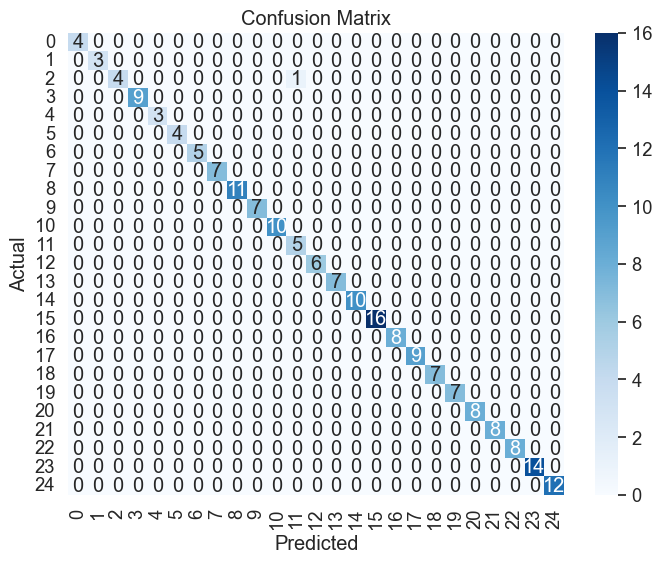

In [23]:
confusion = confusion_matrix(y_test, y_pred)

# Define class labels (if not already defined)
class_labels = np.unique(np.concatenate((y_test, y_pred)))

# Create a heatmap of the confusion matrix
def plot_confusion_matrix(confusion, class_labels):
    plt.figure(figsize=(8, 6))
    sns.set(font_scale=1.2)  # Adjust the font size
    sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

plot_confusion_matrix(confusion, class_labels)

In [24]:
# Create a list of models and their names
models = []

# Defining the models and their names
classifier = [("OneVsRest KNeighbors", OneVsRestClassifier(KNeighborsClassifier())),
    ("Multinomial Naive Bayes", MultinomialNB()),
    ("OneVsRest with Random Forest", OneVsRestClassifier(RandomForestClassifier(n_estimators=100, random_state=42))),
    ("OneVsRest with Support Vector Machine (SVM)", OneVsRestClassifier(SVC(kernel='linear', C=1, probability=True)))
     ]

# Training the models and adding them to the classifier list
for name, model in classifier:
    train_test.train_model(model, X_train, y_train)
    models.append((name, model))

# Printing the names of the models
for name, _ in models:
    print(f"Model Name: {name}")

Model Name: OneVsRest KNeighbors
Model Name: Multinomial Naive Bayes
Model Name: OneVsRest with Random Forest
Model Name: OneVsRest with Support Vector Machine (SVM)


In [25]:
k_folds = 5  # You can change this to the desired number of folds
scoring = 'accuracy'  # You can change the scoring metric as needed

for name, model in models:
    scores = cross_val_score(model, X_train, y_train, cv=k_folds, scoring=scoring)
    mean_accuracy = np.mean(scores)
    std_accuracy = np.std(scores)

    print(f"Model Name: {name}")
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {mean_accuracy}")
    print(f"Standard Deviation of Accuracy: {std_accuracy}")
    print()


Model Name: OneVsRest KNeighbors
Cross-Validation Scores: [0.99350649 0.97402597 0.98701299 0.92857143 0.96732026]
Mean Accuracy: 0.9700874289109583
Standard Deviation of Accuracy: 0.02272300482433497

Model Name: Multinomial Naive Bayes
Cross-Validation Scores: [0.95454545 0.90909091 0.94805195 0.93506494 0.90849673]
Mean Accuracy: 0.9310499957558781
Standard Deviation of Accuracy: 0.019225368112410778

Model Name: OneVsRest with Random Forest
Cross-Validation Scores: [1.         1.         0.98051948 0.98051948 0.99346405]
Mean Accuracy: 0.9909006026653084
Standard Deviation of Accuracy: 0.008805733719438857

Model Name: OneVsRest with Support Vector Machine (SVM)
Cross-Validation Scores: [1.         1.         0.98051948 0.98051948 0.99346405]
Mean Accuracy: 0.9909006026653084
Standard Deviation of Accuracy: 0.008805733719438857

